# classical CIFAR dataset that should be trained and evaluated

(3000, 32, 32, 3) float32
(3000,) float64
(300, 32, 32, 3) float32


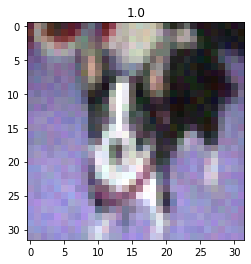

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

with np.load('prediction-challenge-02-data.npz') as fh:
    x_train = fh['x_train']
    y_train = fh['y_train']
    x_test = fh['x_test']

# TRAINING DATA: INPUT (x) AND OUTPUT (y)
# 1. INDEX: IMAGE SERIAL NUMBER (6000)
# 2/3. INDEX: PIXEL VALUE (32 x 32)
# 4. INDEX: COLOR CHANNELS (3)
print(x_train.shape, x_train.dtype)
print(y_train.shape, y_train.dtype)

# TEST DATA: INPUT (x) ONLY
print(x_test.shape, x_test.dtype)

# TRAIN MODEL ON x_train, y_train

# PREDICT prediction FROM x_test
#for i in range(100):
plt.imshow(x_train[1423])
plt.title(y_train[1423])
plt.show()

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import transforms
from tqdm.notebook import tqdm
import PIL


class CIFAR10(torch.utils.data.Dataset):
    def __init__(self, x_train, y_train, transform):
        self.x_train = x_train
        self.y_train = y_train
        self.transform = transform
    
    def __getitem__(self, index):
        return self.transform(self.x_train[index]), self.y_train[index]

    def __len__(self):
        return self.x_train.shape[0]


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = CIFAR10(x_train, y_train, transform)
test_size = 200
test_batch_size = test_size
batch_size = 32
trainset, testset = torch.utils.data.random_split(dataset, [3000 - test_size, test_size])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=False)

classes = ('cat', 'dog', 'frog')

  cat   cat   dog   dog  frog  frog   cat  frog   cat  frog


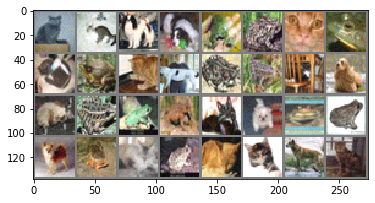

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labelsalt = dataiter.next()
labels= labelsalt.long()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 3)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(40):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labelsalt = data
        #print(labelsalt.type())
        labels= labelsalt.long()
        #print(labels)
        #print(labels.type())
        #labels = torch.labels.type(torch.LongTensor)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 32 == 31:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

[1,    32] loss: 0.352
[1,    64] loss: 0.352
[2,    32] loss: 0.352
[2,    64] loss: 0.352
[3,    32] loss: 0.351
[3,    64] loss: 0.351
[4,    32] loss: 0.351
[4,    64] loss: 0.351
[5,    32] loss: 0.350
[5,    64] loss: 0.350
[6,    32] loss: 0.349
[6,    64] loss: 0.349
[7,    32] loss: 0.347
[7,    64] loss: 0.347
[8,    32] loss: 0.344
[8,    64] loss: 0.343
[9,    32] loss: 0.340
[9,    64] loss: 0.336
[10,    32] loss: 0.331
[10,    64] loss: 0.331
[11,    32] loss: 0.328
[11,    64] loss: 0.323
[12,    32] loss: 0.327
[12,    64] loss: 0.317
[13,    32] loss: 0.317
[13,    64] loss: 0.312
[14,    32] loss: 0.314
[14,    64] loss: 0.314
[15,    32] loss: 0.308
[15,    64] loss: 0.309
[16,    32] loss: 0.307
[16,    64] loss: 0.299
[17,    32] loss: 0.301
[17,    64] loss: 0.297
[18,    32] loss: 0.290
[18,    64] loss: 0.293
[19,    32] loss: 0.297
[19,    64] loss: 0.279
[20,    32] loss: 0.287
[20,    64] loss: 0.271
[21,    32] loss: 0.278
[21,    64] loss: 0.271
[22,    32

GroundTruth:    cat  frog   dog   cat   cat  frog  frog  frog   dog  frog   cat   cat   cat   cat  frog   dog


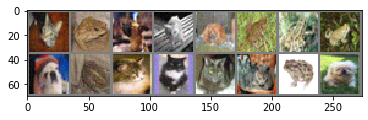

In [7]:
dataiter = iter(testloader)
images, labelsalt = dataiter.next()
images = images[0:16]
labels= labelsalt.long()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(16)))

In [8]:
outputs = net(images)

In [9]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(16)))

Predicted:    cat  frog   dog  frog   dog  frog  frog  frog   dog  frog   cat   cat  frog  frog   cat   dog


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labelsalt = data
        labels= labelsalt.long()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 200 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 200 test images: 69 %


In [11]:
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))
with torch.no_grad():
    for data in testloader:
        images, labelsalt = data
        labels= labelsalt.long()
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(200):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of   cat : 55 %
Accuracy of   dog : 58 %
Accuracy of  frog : 88 %


In [12]:
# PREDICT prediction FROM x_test

net.eval()
with torch.no_grad():
    loader = torch.utils.data.DataLoader(CIFAR10(x_train=x_test, y_train=np.zeros(x_test.shape[0]), transform=transform), batch_size=300, shuffle=False)
    data, _ = next(iter(loader))
    output = net(data)
    prediction = output.argmax(dim=1, keepdim=True).to("cpu").numpy().flatten()

In [13]:
print(prediction)

[2 2 1 1 2 0 0 0 2 0 1 1 1 0 0 2 2 0 1 2 0 0 0 2 1 2 1 0 2 2 1 2 1 1 0 2 2
 1 2 2 1 1 2 0 0 2 2 1 0 1 2 2 1 2 2 0 0 2 0 0 2 1 2 0 0 0 0 2 2 2 2 0 0 2
 2 0 2 1 2 0 2 0 2 1 0 2 0 1 2 0 2 1 2 0 2 1 1 0 2 0 2 2 0 0 1 2 0 0 2 0 1
 0 0 1 2 0 2 0 0 2 1 1 2 0 2 0 2 2 1 2 1 0 0 2 1 1 2 0 0 1 1 2 0 0 0 1 2 2
 0 0 0 1 1 2 0 0 2 2 2 0 2 0 0 0 0 2 0 0 1 0 2 2 2 2 2 1 1 1 0 2 1 0 2 2 1
 2 2 0 2 1 2 1 0 0 2 2 0 1 2 2 0 2 0 0 2 2 1 0 1 0 1 2 2 2 1 0 2 2 0 0 2 0
 0 1 2 0 1 2 2 1 2 0 2 1 1 1 1 2 2 2 0 2 0 1 0 1 1 2 2 1 0 2 2 0 0 0 2 0 1
 2 0 1 2 1 0 0 2 2 1 0 1 0 0 0 0 0 2 2 2 1 2 2 2 0 2 2 0 1 1 0 0 0 1 0 0 0
 2 1 2 0]


In [35]:
# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert prediction.ndim == 1
assert prediction.shape[0] == 300

In [36]:
np.save('prediction.npy', prediction)

In [14]:
inx_liste=[]
for i, cat in enumerate(prediction):
    if prediction[i] == 0:
        inx_liste.append(i)

In [15]:
print(inx_liste)

[5, 6, 7, 9, 13, 14, 17, 20, 21, 22, 27, 34, 43, 44, 48, 55, 56, 58, 59, 63, 64, 65, 66, 71, 72, 75, 79, 81, 84, 86, 89, 93, 97, 99, 102, 103, 106, 107, 109, 111, 112, 115, 117, 118, 123, 125, 131, 132, 137, 138, 142, 143, 144, 148, 149, 150, 154, 155, 159, 161, 162, 163, 164, 166, 167, 169, 178, 181, 187, 192, 193, 196, 200, 202, 203, 207, 209, 215, 218, 219, 221, 222, 225, 231, 240, 242, 244, 250, 253, 254, 255, 257, 260, 264, 265, 269, 271, 272, 273, 274, 275, 283, 286, 289, 290, 291, 293, 294, 295, 299]


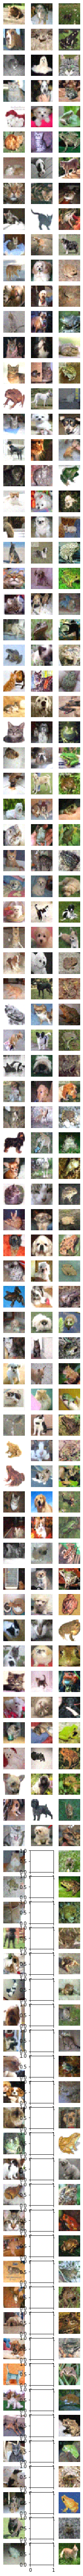

In [16]:
nrows = 100
fig, ax = plt.subplots(ncols=3, nrows=nrows, figsize=(3, nrows))
indices = np.arange(prediction.shape[0])
for col in range(3):
    col_indices = indices[prediction == col]
    for row in range(min(nrows, len(col_indices))):
        ax[row][col].imshow(x_test[col_indices[row]][:, :])
        ax[row][col].axis("off")
plt.show()

#imshow(torchvision.utils.make_grid(data[inx_liste]))

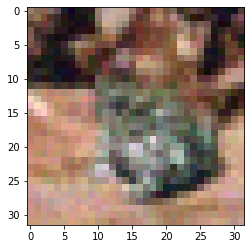

In [103]:
imshow(torchvision.utils.make_grid(data[8]))

In [ ]:
test_labels_correct=[,2,1,,0,,1,0]